In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from pprint import pprint
import _pickle as pickle

import time

In [3]:
# My libraries
import sim_ann as sa
import model

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Perform simulated annealing.

Change the values for min and max temperature and alpha in the file sim_ann.py. 

In [6]:
t0 = time.time()
parameters, cost_hist, parameters_hist = sa.parameter_tuning()
t1 = time.time()
total = t1-t0
print('Total time spent: ', total)

Temp:  1.0
Lower!
{'arousal': [0.7923702809725619, 2.468389963558457],
 'attention_1': [2.7547323654269507, 2.083099432764345],
 'attention_2': [0.6042961746449236, 5.154961519319538],
 'ff_ent': [1.2360356565717583, 1.5453634361487758],
 'ff_is': [1.974120600224095, 3.6678244030256533],
 'ff_ko': [1.5703804820664211, 1.7363256823418305],
 'ff_se': [2.7188348622540652, 2.2510079003304484],
 'ff_si': [1.2212128127536674, 3.7825637942188814],
 'mood': [1.438079000658109, 2.442860588893536],
 'mood_speed': 0.012964240719628038,
 'prep_comm': [3.6528424399255592, 2.2190454755376003],
 'prep_like': [2.8517297936201196, 1.6339552436610507],
 'prep_share': [2.0775346655366564, 2.5945444672825664],
 'satisfaction': [1.0679289813182242, 4.572980597984078],
 'srs_sal': [0.8269621493705823, 2.309200920631528]}
86.3484794014
Temp:  0.5
Lower!
Lower!
Lower!
{'arousal': [0.8314216964185437, 2.2597063818766703],
 'attention_1': [2.7025169503058617, 1.0243324683981812],
 'attention_2': [0.550315425854

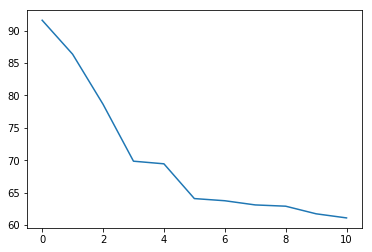

In [7]:
plt.plot(cost_hist)

## Dumping the simulated annealing results

In [8]:
with open('pickle/parameters.txt', 'wb') as fp:
    pickle.dump(parameters, fp)

with open('pickle/cost_hist.txt', 'wb') as fp:
    pickle.dump(cost_hist, fp)

with open('pickle/parameters_hist.txt', 'wb') as fp:
    pickle.dump(parameters_hist, fp)
    

## Loading simulated annealing results

with open ('pickle/parameters.txt', 'rb') as fp:
    parameters = pickle.load(fp)

with open ('pickle/cost_hist.txt', 'rb') as fp:
    cost_hist = pickle.load(fp)

with open ('pickle/parameters_hist.txt', 'rb') as fp:
    parameters_hist = pickle.load(fp)

## Process results

In [9]:
#steepness values from 0.5 (for four arrows), 0.7 (for three arrows),  1 (for two arrows) to 2.5 (for 1 arrow)
a = parameters_hist[-1]

In [10]:
a

{'arousal': [0.9731837964406724, 3.846425662782503],
 'attention_1': [2.679154764370345, 0.8062670737448834],
 'attention_2': [1.0940274587284564, 4.869819181435982],
 'ff_ent': [1.798652062530779, 2.811871188195733],
 'ff_is': [1.412667846107801, 4.6534083890005915],
 'ff_ko': [0.7990574566367912, 1.675209446450498],
 'ff_se': [2.2122502414270215, 2.9533113151669035],
 'ff_si': [1.55177111762969, 3.27491942690271],
 'mood': [1.5122541244283043, 3.235213942538439],
 'mood_speed': 0.0016031876385029324,
 'prep_comm': [3.843614059245458, 3.1766988028433287],
 'prep_like': [2.5358123410053985, 2.5362549208196934],
 'prep_share': [2.6595071538494803, 2.41286613903472],
 'satisfaction': [1.00327413437779, 3.6804126103544275],
 'srs_sal': [1.4105027959685836, 2.1510248459581662]}

In [11]:
new_cost = sa.get_error(a)

In [12]:
new_cost

(61.108645297783568,
 {'arousal': [0.9731837964406724, 3.846425662782503],
  'attention_1': [2.679154764370345, 0.8062670737448834],
  'attention_2': [1.0940274587284564, 4.869819181435982],
  'ff_ent': [1.798652062530779, 2.811871188195733],
  'ff_is': [1.412667846107801, 4.6534083890005915],
  'ff_ko': [0.7990574566367912, 1.675209446450498],
  'ff_se': [2.2122502414270215, 2.9533113151669035],
  'ff_si': [1.55177111762969, 3.27491942690271],
  'mood': [1.5122541244283043, 3.235213942538439],
  'mood_speed': 0.0016031876385029324,
  'prep_comm': [3.843614059245458, 3.1766988028433287],
  'prep_like': [2.5358123410053985, 2.5362549208196934],
  'prep_share': [2.6595071538494803, 2.41286613903472],
  'satisfaction': [1.00327413437779, 3.6804126103544275],
  'srs_sal': [1.4105027959685836, 2.1510248459581662]},
           mood      like     share   comment
 19    0.495321  0.063737  0.054123  0.000488
 39    0.499296  0.261162  0.215939  0.001771
 59    0.506099  0.198742  0.164238  0.1

In [13]:
mood = 0.5

# Get the traits for the agents
validation_f = 'validation/'

agent1 = pd.read_csv(validation_f+'agent_1.csv')
agent2 = pd.read_csv(validation_f+'agent_2.csv')
agent3 = pd.read_csv(validation_f+'agent_3.csv')

a1_dict = agent1.to_dict()
a2_dict = agent2.to_dict()
a3_dict = agent3.to_dict()

#[pt_con, nf_ko, nf_ent, nf_is, nf_si, nf_se, mood]
a1_traits = [a1_dict['nf_ko'][0], a1_dict['nf_ent'][0], a1_dict['nf_is'][0], 
             a1_dict['nf_si'][0], a1_dict['nf_se'][0], a1_dict['pt_con'][0], mood]
a2_traits = [a2_dict['nf_ko'][0], a2_dict['nf_ent'][0], a2_dict['nf_is'][0], 
             a2_dict['nf_si'][0], a2_dict['nf_se'][0], a2_dict['pt_con'][0], mood]
a3_traits = [a3_dict['nf_ko'][0], a3_dict['nf_ent'][0], a3_dict['nf_is'][0], 
             a3_dict['nf_si'][0], a3_dict['nf_se'][0], a3_dict['pt_con'][0], mood]


# Get validation data set
data_a1 = pd.read_csv(validation_f+'validation_agent_1.csv')
data_a2 = pd.read_csv(validation_f+'validation_agent_2.csv')
data_a3 = pd.read_csv(validation_f+'validation_agent_3.csv')

messages1 = data_a1[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]
messages2 = data_a2[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]
messages3 = data_a3[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]

reactions1 = data_a1[['mood', 'like', 'comment', 'share']]
reactions2 = data_a2[['mood', 'like', 'comment', 'share']]
reactions3 = data_a3[['mood', 'like', 'comment', 'share']]

# Agent 1

In [14]:
inputsDF, parameters = model.run_message_sequence(messages1.values, a1_traits,parameters, 'nb1')

In [15]:
parameters

{'arousal': [0.9731837964406724, 3.846425662782503],
 'attention_1': [2.679154764370345, 0.8062670737448834],
 'attention_2': [1.0940274587284564, 4.869819181435982],
 'ff_ent': [1.798652062530779, 2.811871188195733],
 'ff_is': [1.412667846107801, 4.6534083890005915],
 'ff_ko': [0.7990574566367912, 1.675209446450498],
 'ff_se': [2.2122502414270215, 2.9533113151669035],
 'ff_si': [1.55177111762969, 3.27491942690271],
 'mood': [1.5122541244283043, 3.235213942538439],
 'mood_speed': 0.0016031876385029324,
 'prep_comm': [3.843614059245458, 3.1766988028433287],
 'prep_like': [2.5358123410053985, 2.5362549208196934],
 'prep_share': [2.6595071538494803, 2.41286613903472],
 'satisfaction': [1.00327413437779, 3.6804126103544275],
 'srs_sal': [1.4105027959685836, 2.1510248459581662]}

## Inputs

### Message Categories

Text(0.5,0,'Time step')

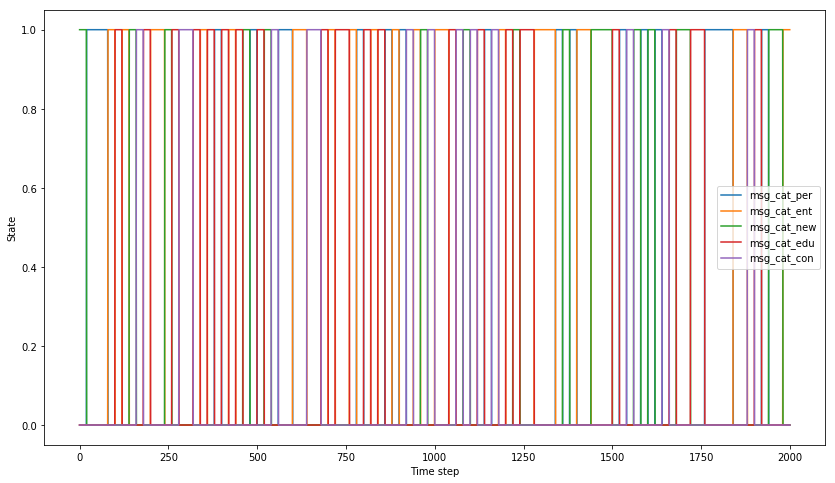

In [17]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

Text(0.5,0,'Time step')

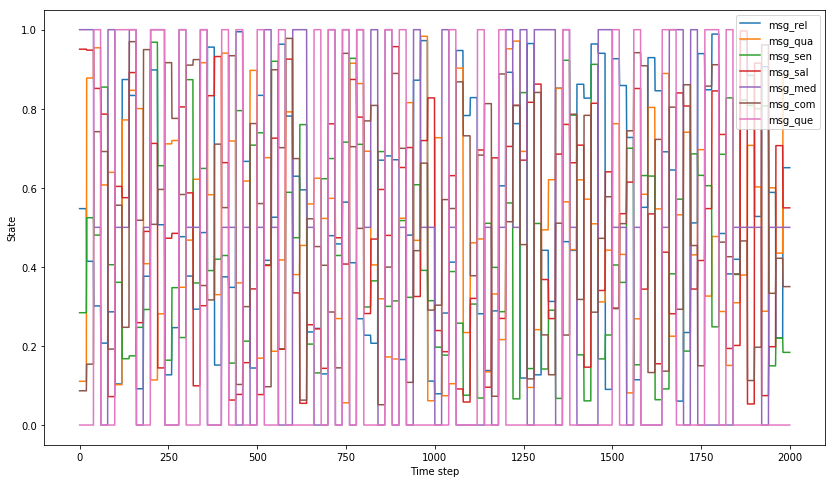

In [18]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

Text(0.5,0,'Time step')

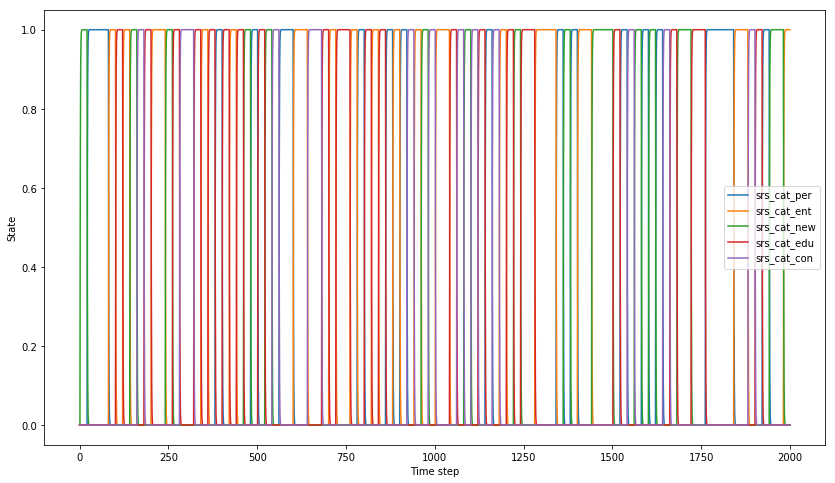

In [19]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

Text(0.5,0,'Time step')

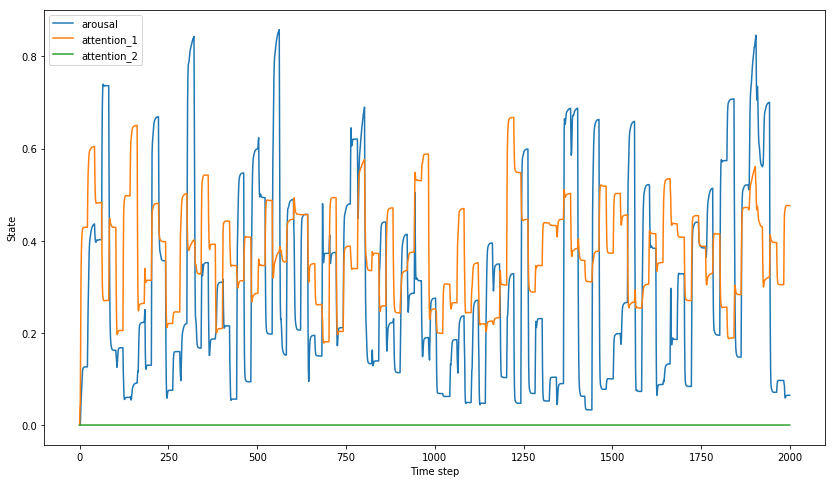

In [20]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### FFs

Text(0.5,0,'Time step')

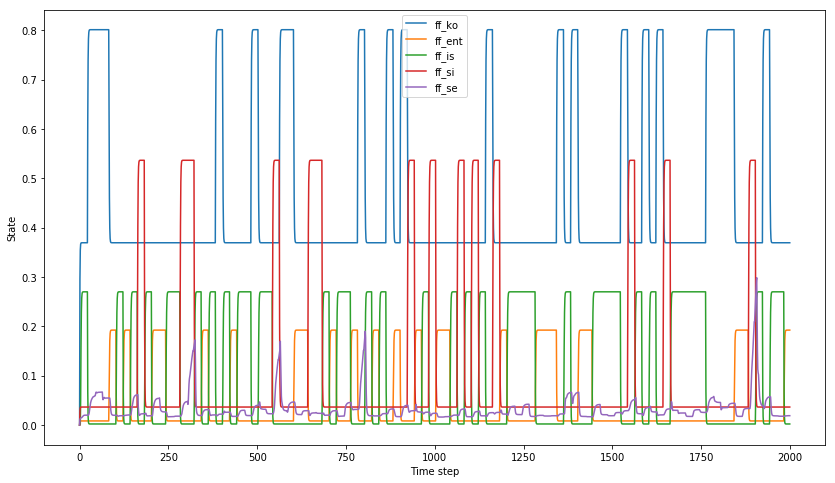

In [21]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction, dissatisfaction

Text(0.5,0,'Time step')

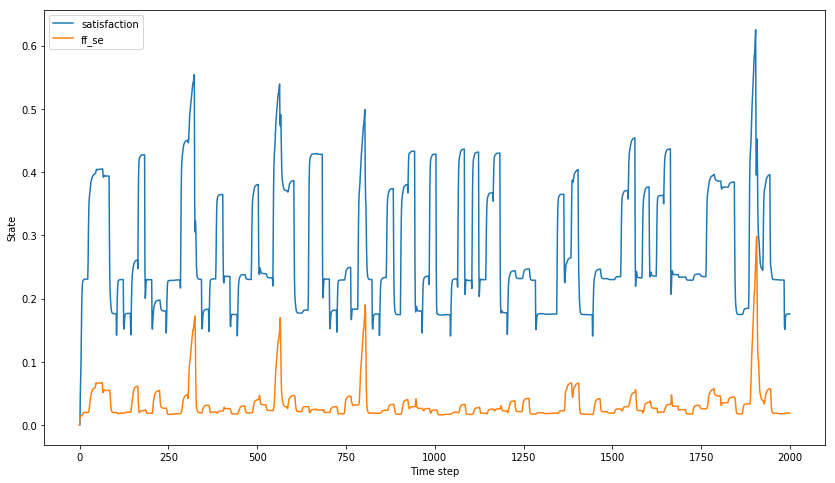

In [23]:
inputsDF[['satisfaction', 'ff_se']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

Text(0.5,0,'Time step')

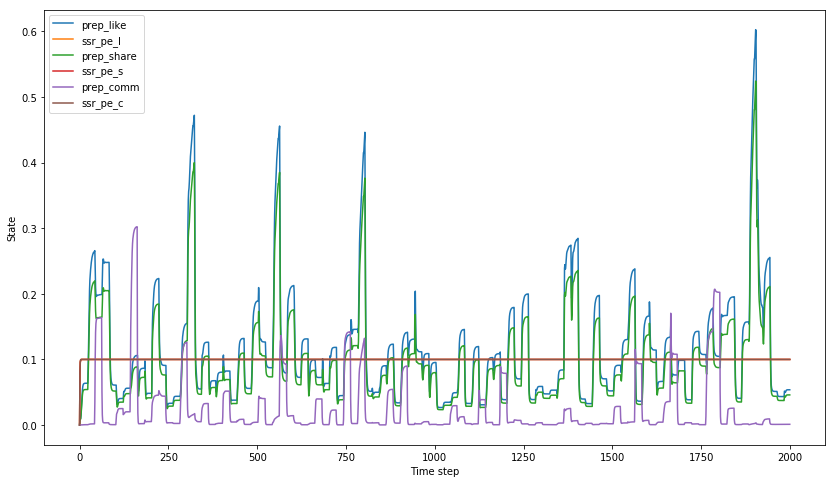

In [24]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Outputs

Text(0.5,0,'Time step')

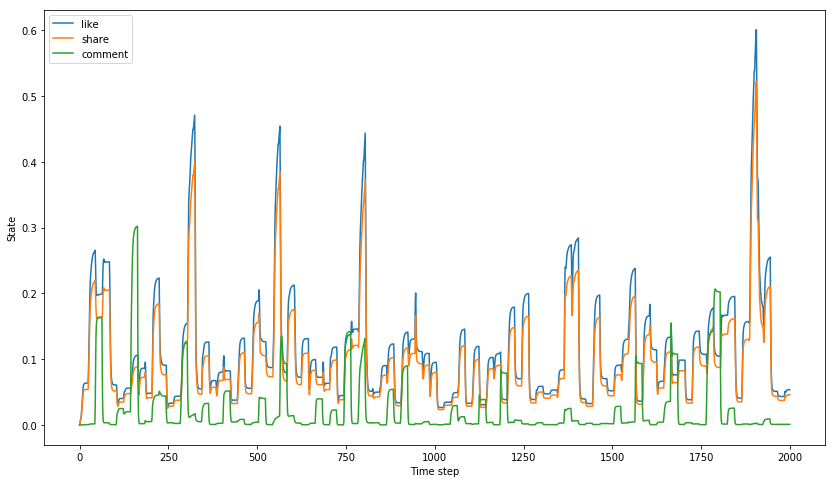

In [25]:
inputsDF[['like', 'share', 'comment']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Expected reactions

Text(0.5,0,'Time step')

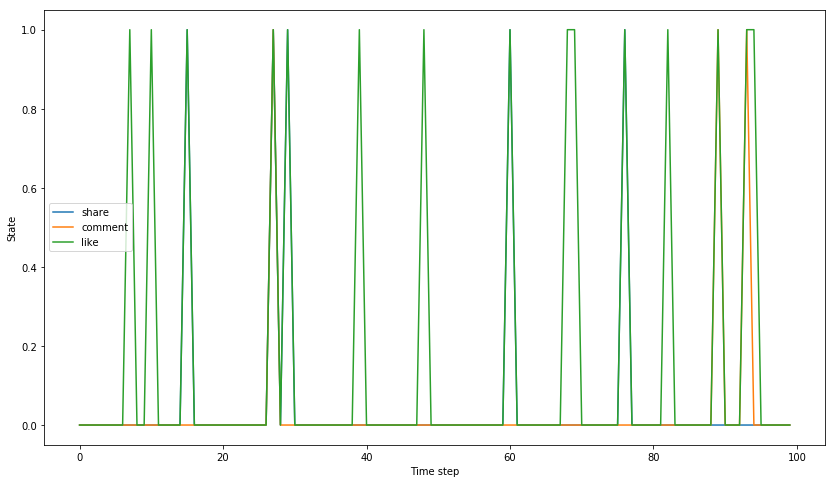

In [26]:
reactions1[['share', 'comment', 'like']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

In [ ]:
inputsDF.columns

# Agent 2

In [ ]:
inputsDF, parameters = model.run_message_sequence(messages2.values, a2_traits,parameters, 'nb3')

In [ ]:
parameters

## Inputs

### Message Categories

In [ ]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

In [ ]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

In [ ]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

In [ ]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### FFs

In [ ]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction, dissatisfaction

In [ ]:
inputsDF[['satisfaction', 'dissatisfaction', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

In [ ]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Outputs

In [ ]:
inputsDF[['like', 'share', 'comment']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Expected reactions

In [ ]:
reactions2[['share', 'comment', 'like']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

In [ ]:
inputsDF.columns

# Agent 3

In [ ]:
inputsDF, parameters = model.run_message_sequence(messages3.values, a3_traits,parameters, 'nb3')

In [ ]:
parameters

## Inputs

### Message Categories

In [ ]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

In [ ]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

In [ ]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

In [ ]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### FFs

In [ ]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction, dissatisfaction

In [ ]:
inputsDF[['satisfaction', 'dissatisfaction', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

In [ ]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Outputs

In [ ]:
inputsDF[['like', 'share', 'comment']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Expected reactions

In [ ]:
reactions3[['share', 'comment', 'like']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

In [ ]:
inputsDF.columns